# Columns explanation 
1. GRE Scores ( out of 340 ) 
2. TOEFL Scores ( out of 120 ) 
3. University Rating ( out of 5 ) 
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 
5. Undergraduate GPA ( out of 10 ) 
6. Research Experience ( either 0 or 1 ) 
7. Chance of Admit ( ranging from 0 to 1 )

# Contents
1. make sure train data and test data
2. EDA
3. use sklearn and statsmodel build linear regression models based on different independent variables
4. check the residual
5. evaluate the model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import statsmodels.api as sm
import scipy as sp
from sklearn.metrics import mean_squared_error
from sklearn.externals import joblib

## Make sure train and test datasets.

In [3]:
df1 = pd.read_csv("./data/Admission_Predict.csv")
df2 = pd.read_csv("./data/Admission_Predict_Ver1.1.csv")  

In [4]:
print(df1.shape)
print(df2.shape)

(400, 9)
(500, 9)


In [5]:
# find how many rows which instances are in df1 but not
# in df2. Note: longer dataset.isin(shorter dataset)
len(df2[~df2.isin(df1)].dropna())

100

So there are 100 rows which are in df2 not in df1. We will use these 100 rows as the test data.

In [6]:
df_train = df1
df_test = df2.iloc[400:]
df_test.shape

(100, 9)

# EDA

In [7]:
# check columns in train data
df_train.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
# change some column names to the simple style
df_train = df_train.rename(columns={'Serial No.':'SerialNo','GRE Score':'GREScore',
                         'TOEFL Score':'TOEFLScore','LOR ':'LOR',
                         'University Rating':'UniversityRating',
                         'Chance of Admit ':'ChanceOfAdmit'})

In [9]:
# check train dataset info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
SerialNo            400 non-null int64
GREScore            400 non-null int64
TOEFLScore          400 non-null int64
UniversityRating    400 non-null int64
SOP                 400 non-null float64
LOR                 400 non-null float64
CGPA                400 non-null float64
Research            400 non-null int64
ChanceOfAdmit       400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


From the info() function, we know no NAN value is in dataset. In my opinion, University Rating, SOP, and LOR should be ordinal categorical variables. Research should be boolean variable. 
In the dataset, it is already converted the form that we want.

In [10]:
# get statistics of train dataset
df_train.describe()

,SerialNo,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### Plot histograms for each column

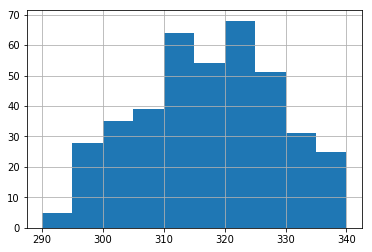

In [11]:
df_train['GREScore'].hist()

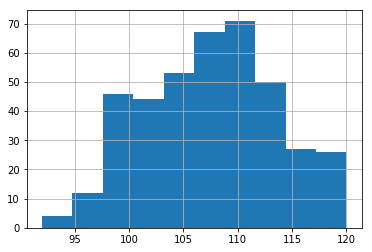

In [12]:
df_train['TOEFLScore'].hist()

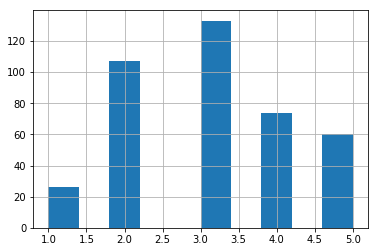

In [13]:
df_train['UniversityRating'].hist()

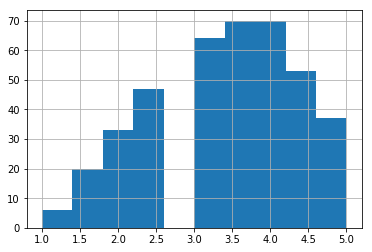

In [14]:
df_train['SOP'].hist()

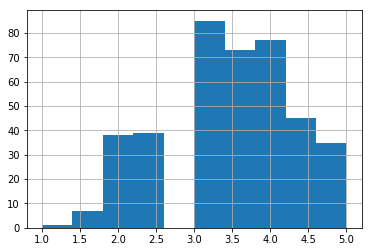

In [15]:
df_train['LOR'].hist()

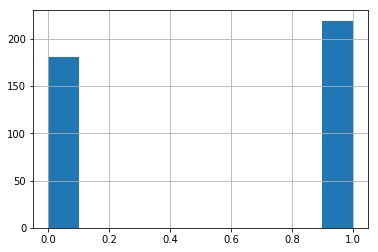

In [16]:
df_train['Research'].hist()

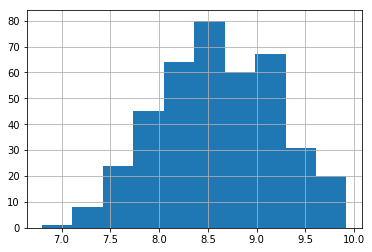

In [17]:
df_train['CGPA'].hist()

From the histogram, GREScore, TOEFLScore, and CGPA are close to the normal distribution. UniversityRating is the discrete varibale. SOP and LOR are kind of normal distribution except no value is in (2.5, 3.0). Research is a boolean varibale.

### two variables histograms

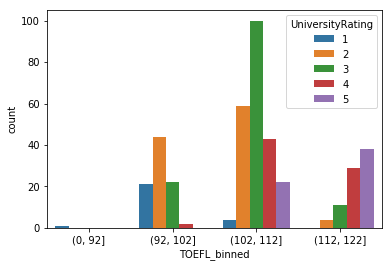

In [18]:
# Firstly check relationship between TOEFLScore(GREScore has high correlation with
# TOEFLScore, so just check TOEFLScore), Research, SOP(
# LOR has high correlation with SOP) and UniversityRating seperately.
bins = [0, 92, 102, 112, 122]
df_train['TOEFL_binned'] = pd.cut(df_train['TOEFLScore'], bins)
sns.countplot(x='TOEFL_binned', hue='UniversityRating', data=df_train)
plt.show()

We could say the higher TOEFLScore, the higher proportion of appling to the good universities. This consist to our common.

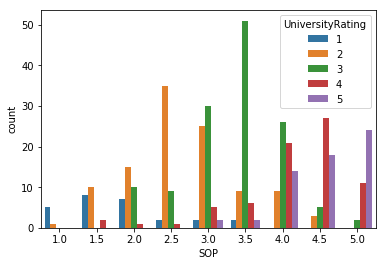

In [19]:
sns.countplot(x='SOP', hue='UniversityRating', 
              data=df_train)
plt.show()

The higher SOP, the higher proportion of appling the good universities.

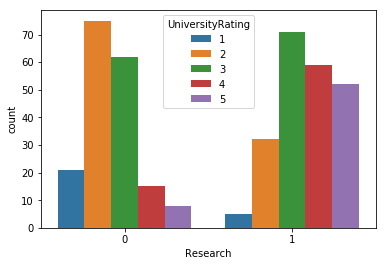

In [20]:
sns.countplot(x='Research', hue='UniversityRating', data=df_train)
plt.show()

If students have the research experience, we will apply good universities.Because they are more competitive.

In [21]:
# Here to check the relationship between SOP, UniversityRating, 
# Research and ChanceofAdmit seperately.
bins = [0.2, 0.4, 0.6, 0.8, 1.0]
df_train['ChanceOfAdmit_binned'] = pd.cut(df_train['ChanceOfAdmit'], bins)

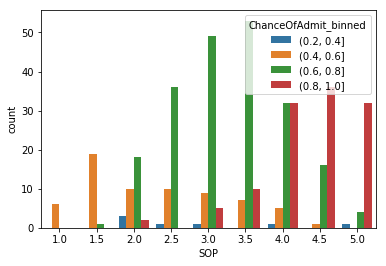

In [22]:
sns.countplot(x='SOP', hue='ChanceOfAdmit_binned', data=df_train)
plt.show()

The higher SOP, the higher chance of adimission.

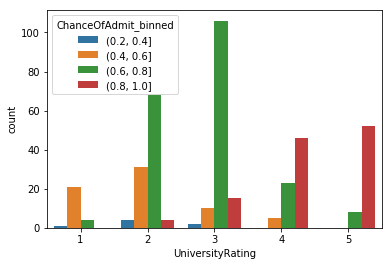

In [23]:
sns.countplot(x='UniversityRating', hue='ChanceOfAdmit_binned', data=df_train)
plt.show()

The higher university rating, the higher chance of admission. I guess the reason is students who applied the high rating university are excellent. The universities want these kind of students. Thus, the chance is higher.

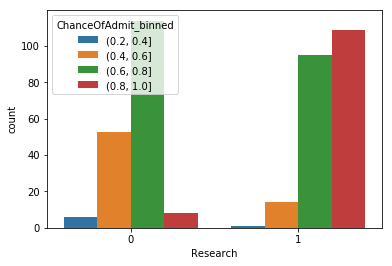

In [24]:
sns.countplot(x='Research', hue='ChanceOfAdmit_binned', data=df_train)
plt.show()

Still, having research experience will increase the chance of admission.

### Plot pairplot

In [25]:
# split cols into two parts num_cols and rest_cols
num_cols = ['GREScore', 'TOEFLScore', 'CGPA']
rest_cols = ['UniversityRating', 'SOP','LOR','Research']
num_cols_target = num_cols + ['ChanceOfAdmit']
rest_cols_target = rest_cols + ['ChanceOfAdmit']

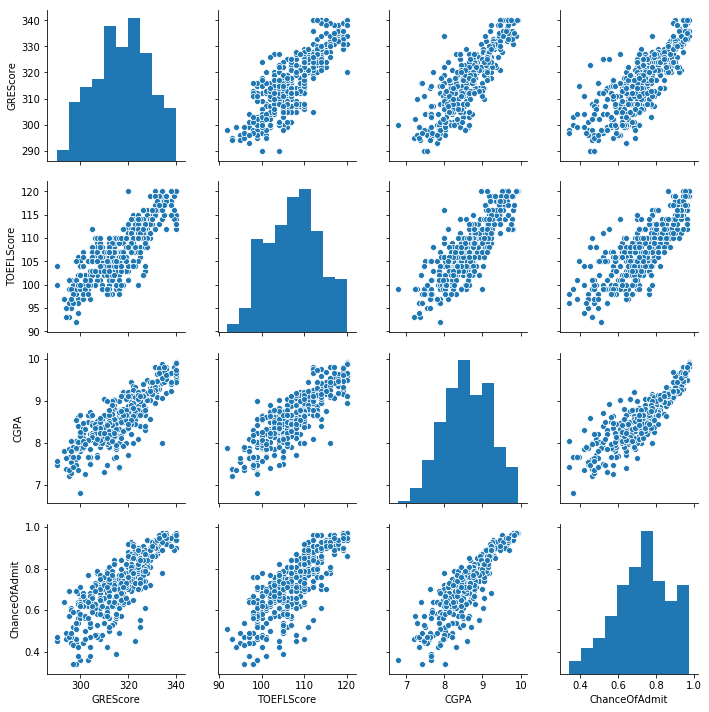

In [26]:
sns.pairplot(df_train[num_cols_target])

Each pair in the above plot has positive correlation.

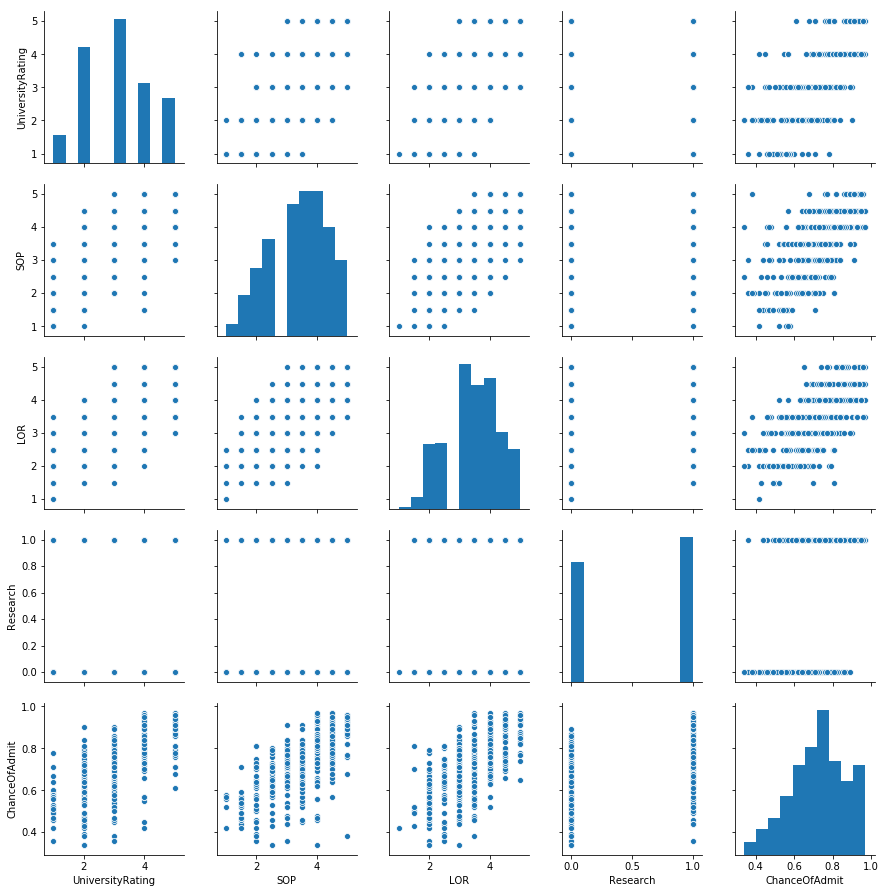

In [27]:
sns.pairplot(df_train[rest_cols_target])

The relationship is not so obvious.But we could know SOP and LOR have positive correlation. SOP and ChanceOfAdmit have positive correlation.LOR and ChanceOfAdmit have positive correlation.

### Plot heatmap

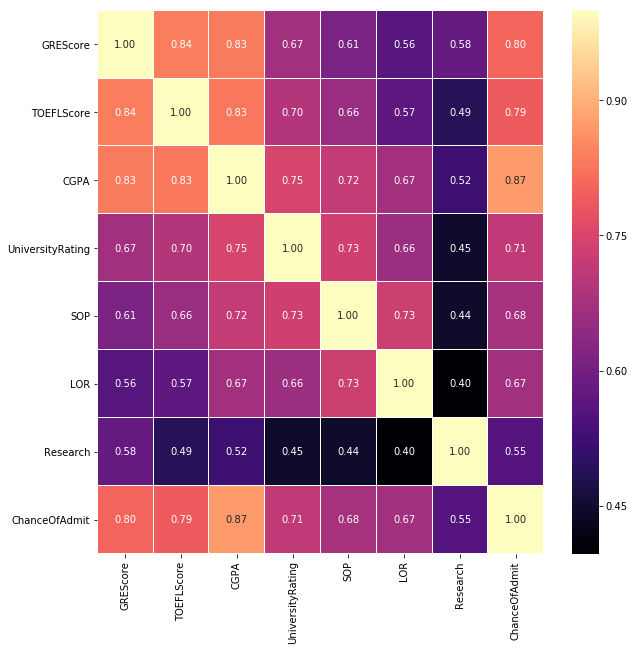

In [28]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_train[num_cols+rest_cols+['ChanceOfAdmit']].corr(),
            ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

We could know GREScore, TOEFLScore, and CGPA have high correlation with chance of admit seperately. But the high correlation among some of the predictors suggests that data-based multicollinearity exists.

A good news! If the primary purpose of your regression analysis is to estimate a mean response μY or to predict a new response y, you don't have to worry much about multicollinearity. In order words, high multicollinearity among predictor variables does not prevent good, precise predictions of the response within the scope of the model.

## Build multiple linear regression model

### Just modeling based on num_cols

In [29]:
# Before build a linear model, we need to scale the data
def scaling(df, train=True):
    '''use StandardScaler to scale raw data'''
    cols = df.columns
    scaler = StandardScaler()
    if train:
        scaler.fit(df)
        joblib.dump(scaler, "scaler.save")          
    else:
        scaler = joblib.load("scaler.save")
    scaled_df = scaler.transform(df)
    df_X = pd.DataFrame(scaled_df, columns=cols)
    
    return df_X

In [30]:
# sklearn modeling
def model_sklearn(x, y):
    '''Use sklearn to build model'''
    reg = linear_model.LinearRegression()
    reg.fit(x, y)
    joblib.dump(reg, 'model.h5')
    print('Intercept: \n', reg.intercept_)
    print('Coefficients: \n', reg.coef_)


In [31]:
# statsmodels modeling
def model_stats(x, y):
    x = sm.add_constant(x) # adding a constant

    model = sm.OLS(y, x).fit()
    predictions = model.predict(x) 

    print_model = model.summary()
    print(print_model)
    
    return predictions

In [32]:
# Use sklearn to build the model  
X = scaling(df_train[num_cols]) 
Y = df_train['ChanceOfAdmit']
model_sklearn(X, Y)


Intercept: 
 0.7243499999999999
Coefficients: 
 [0.02596628 0.01886623 0.08712281]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


In [33]:
# Use statsmodels to build the model
y_pred = model_stats(X, Y)

                            OLS Regression Results                            
Dep. Variable:          ChanceOfAdmit   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     483.0
Date:                Thu, 09 May 2019   Prob (F-statistic):          6.77e-132
Time:                        13:31:25   Log-Likelihood:                 519.74
No. Observations:                 400   AIC:                            -1031.
Df Residuals:                     396   BIC:                            -1016.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7244      0.003    218.439      0.0

Explain of above results. 
The coefficients are same as Sklearn. So these two package will give us the same results. That's we expect.
For GREScore, TOEFLScore and CGPA, p-values of t-test are very small so we have evidence to reject the null hypothesis(b1=0, b2=0, b3=0). It means these 3 independent variables are significant.

### Draw Q-Q plot of residual to check the normality.

In [34]:
def dia_res(y_true, y_pred):
    residual = y_true - y_pred
    fig, ax = plt.subplots(figsize=(6,2.5))
    _, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

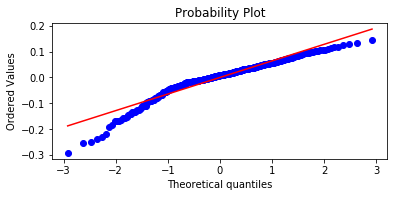

In [35]:
dia_res(df_train['ChanceOfAdmit'], y_pred)

The tail and head are not like normal distribution. But the middle part is good enough.

### Evaluate model using test data

In [36]:
# Do the same preprocess for test data
df_test = df_test.rename(columns={'Serial No.':'SerialNo','GRE Score':'GREScore',
                         'TOEFL Score':'TOEFLScore','LOR ':'LOR',
                         'University Rating':'UniversityRating',
                         'Chance of Admit ':'ChanceOfAdmit'})
df_test_y = df_test['ChanceOfAdmit']

In [37]:
# calculate MSE
def evaluate_model(x, y_true):
    model = joblib.load('model.h5')
    pred = model.predict(x)
    mse = mean_squared_error(df_test_y, pred)
    
    return mse

In [38]:
test_X = scaling(df_test[num_cols], train=False)
mse = evaluate_model(test_X, df_test_y)
print(mse)

0.0020301005794081594


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


Not bad!

### Just modeling based on rest_cols

In [39]:
# Use sklearn to build the model  
X = scaling(df_train[rest_cols]) 
Y = df_train['ChanceOfAdmit']
model_sklearn(X, Y)

Intercept: 
 0.72435
Coefficients: 
 [0.04771466 0.0197705  0.0358269  0.03443041]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


In [40]:
# Use statsmodels to build the model
y_pred = model_stats(X, Y)

                            OLS Regression Results                            
Dep. Variable:          ChanceOfAdmit   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     171.3
Date:                Thu, 09 May 2019   Prob (F-statistic):           6.59e-85
Time:                        13:34:04   Log-Likelihood:                 413.17
No. Observations:                 400   AIC:                            -816.3
Df Residuals:                     395   BIC:                            -796.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7244      0.004  

### Draw Q-Q plot of residual to check the normality.

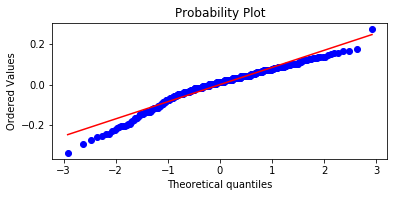

In [41]:
dia_res(df_train['ChanceOfAdmit'], y_pred)

### Evaluate model using test data

In [42]:
test_X = scaling(df_test[rest_cols], train=False)
mse = evaluate_model(test_X, df_test_y)
print(mse)

0.007328704598325252


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


### Modeling based on num_cols + rest_cols

In [43]:
# Use sklearn to build the model  
X = scaling(df_train[num_cols + rest_cols]) 
Y = df_train['ChanceOfAdmit']
model_sklearn(X, Y)

Intercept: 
 0.72435
Coefficients: 
 [ 0.01990951  0.01769825  0.07083692  0.00653012 -0.00332371  0.02005866
  0.01220709]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


In [44]:
# Use statsmodels to build the model
y_pred = model_stats(X, Y)

                            OLS Regression Results                            
Dep. Variable:          ChanceOfAdmit   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     228.9
Date:                Thu, 09 May 2019   Prob (F-statistic):          3.12e-134
Time:                        13:35:25   Log-Likelihood:                 537.37
No. Observations:                 400   AIC:                            -1059.
Df Residuals:                     392   BIC:                            -1027.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7244      0.003  

### Draw Q-Q plot of residual to check the normality.

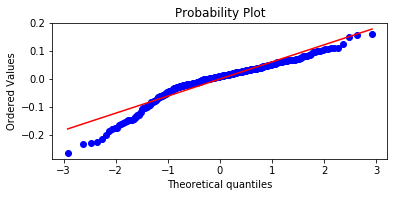

In [45]:
dia_res(df_train['ChanceOfAdmit'], y_pred)

### Evaluate model using test data

In [46]:
test_X = scaling(df_test[num_cols + rest_cols], train=False)
mse = evaluate_model(test_X, df_test_y)
print(mse)

0.0018431744376047375


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


# Conclusion
The linear model with num_cols + rest_cols as independent variables has the smallest MSE. So it is the best multiple model for this regression problem.